# Metrics

This notebook will show different types of metrics applied to evaluate a model. 

* __Accuracy__

* __Recall__: tp / (tp + fn)

* __Precision__: tp / (tp + fp)

* __F1 Score__: F1 = 2 * (precision * recall) / (precision + recall)

* __F-beta Score__: The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0. The beta parameter determines the weight of precision in the combined score. beta < 1 lends more weight to precision, while beta > 1 favors recall (beta -> 0 considers only precision, beta -> inf only recall).

* __ROC - Curve__
 * ROC AUC - Compute Area Under the Receiver Operating Characteristic Curve from prediction scores. Best possible score: 1

* __Regression Metrics__
 * Mean Absolute Error
 * Mean Squared Error
 * R2 Score: Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

### Adding a Model

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# initiate the classifier
classifier = LogisticRegression()

# read and organize data
df = pd.read_csv("2_class_data.csv")
X = np.array(df[['x1', 'x2']])
y = np.array(df['y'])
X_train, X_test, y_train, y_test = \
train_test_split(X,y, test_size = 0.25)

# fit the classifier
classifier.fit(X_train, y_train)

# predicting values
y_pred = classifier.predict(X_test)

/home/yuri/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Evaluating the Model

#### Accuracy

In [11]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Model Accuracy: " + str(acc*100) + "%")

Model Accuracy: 84.0%


#### Recall

In [23]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)
print("Model Recall: " + str(round(rec,3)*100) + "%")

Model Recall: 81.8%


#### Precision

In [24]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)
print("Model Precision: " + str(round(prec,3)*100) + "%")

Model Precision: 81.8%


#### F1 - Score

In [26]:
from sklearn.metrics import f1_score

F1 = f1_score(y_test, y_pred)
print("Model F1 Score: " + str(round(F1, 3)*100) + "%")

Model F1 Score: 81.8%


#### F-beta Score

In [34]:
from sklearn.metrics import fbeta_score

# Favoring recall
fbeta = fbeta_score(y_test, y_pred, 2)
print("Fbeta favoring recall: " + str(round(fbeta,3)*100) + "%")

# Favoring precision
fbeta = fbeta_score(y_test, y_pred, 0.5)
print("Fbeta favoring precision: " + str(round(fbeta,3)*100) + "%")

Fbeta favoring recall: 81.8%
Fbeta favoring precision: 81.8%


#### ROC

ROC AUC: 0.838


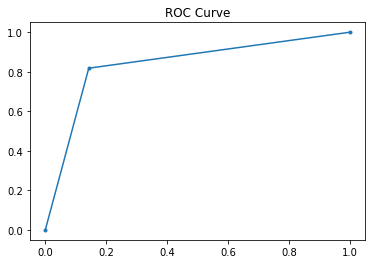

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from matplotlib import pyplot as plt

# calculate values of the roc curve 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title("ROC Curve")

# calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC: " + str(round(roc_auc,3)))



#### Mean Absolute Error

In [47]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: " + str(round(MAE,3)))

Mean Absolute Error: 0.16


#### Mean Squared Error

In [50]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: " + str(round(MSE,3)))

Mean Squared Error: 0.16


#### R2 Score

In [52]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R2 Score: " + str(round(r2,3)))

R2 Score: 0.351
